# Neural Networks #

In this week's session we will be learning about neural networks, focusing primarily on convolutional neural networks (CNNs). CNNs have become a useful tool for the development of self-driving cars, object/face recognition software, medical imaging analysis (e.g., MRI), and many other areas. These models can be simple to build using tools like TensorFlow and Pytorch, the latter of which we’ll use for our demo. Their inner workings, however, combine nearly all of the tools introduced throughout this workshop including: linear regression, regularization, optimization, and dimensionality reduction. I hope to provide a brief introduction to CNNs, give you some hands-on experience with a pre-built model and then provide some time for discussion.

### Session outline: ###
•	Introduction to Neural Networks
•	Introduction to CNNs
•	Demo session with a pre-built CNN
•	Discussion
### Preparation for the workshop: ###
Watch the following videos:

o	https://www.youtube.com/watch?v=aircAruvnKk

o	https://www.youtube.com/watch?v=YRhxdVk_sIs

Read these articles:

o	https://www.smartsheet.com/neural-network-applications

o	https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795b



## Convolutional Neural Networks ##

The following code has been modified from:

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

and is courtesy of Raymond Doudlah 

**_If you are interested, feel free visit the website to see the original code and explaination._

#### Instructions: ####

Read through the explaination for each section of code and then run each block of code in consecutive order. If you have any questions about the code or the underlying theory please feel free to ask (_if you have questions after the session, please send me an email at doudlah@wisc.edu_).


For this session, we will use **Pytorch**, an open source deep learning library. To learn more, visit the Pytorch website (https://pytorch.org/). There are many great tutorials to check out!

## Step 1: Preparing the data ##

_**Note:** The MNIST dataset is freely available (http://yann.lecun.com/exdb/mnist/). Feel free to visit the website to learn more about the dataset and how it was created._

Pytorch has a built-in fuction for downloading the MNIST dataset. The code will load a training dataset and a test dataset. The code will also display example images from the MNIST dataset.

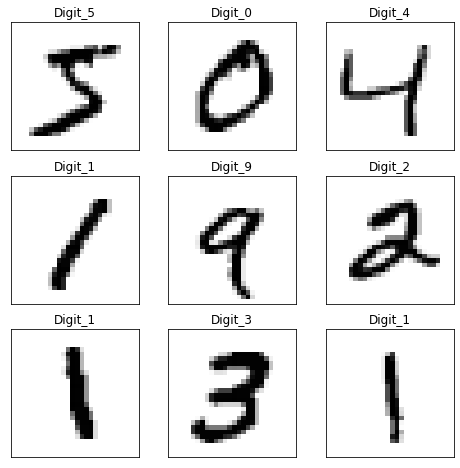

In [2]:
# Import required libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Transform torchvision dataset from [0,1] to [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Load training data
trainData = torchvision.datasets.MNIST(root='./CNN_Data',train=True,
                                      download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainData, batch_size=10,
                                         shuffle=False, num_workers=2)

# Load testing data
testData = torchvision.datasets.MNIST(root='./CNN_Data',train=False,
                                      download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testData, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('Digit_0','Digit_1','Digit_2','Digit_3','Digit_4','Digit_5',
           'Digit_6','Digit_7','Digit_8','Digit_9')

# Display example images
dataiter = iter(trainloader)
images,labels = dataiter.next()

# Display example hand written digits
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i].squeeze(), cmap=plt.cm.binary)
  plt.title(classes[labels[i]])

## Step 2: Building the Convolutional Neural Network Model ##

To build the model, we define a class and add all of the layers and computational steps. Here we have three fully connected layers with 120, 84, and 10 nodes in each respective layer. Notice how the last layer must still have 10 nodes becasue we are differentiating between 10 classes. 

The "forward" function takes the input image $x$ and propagates the data through the network. Notice that after each convolution we apply the "relu" activation function and then pool (or downsample) the data. 

### **The 'relu' activation function** ###

'_relu_' is a type of activation function, which stands for "rectified linear unit" and is defined as:

$
f(x)= 
\begin{cases}
    x,& \text{for } x > 0\\
    0,              & \text{otherwise}
\end{cases}
$ 

In [3]:
# Define the model architecture
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 4)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 4)
    # self.fc1 = nn.Linear(16 * 4 * 4, 120)
    # self.fc2 = nn.Linear(120, 84)
    # self.fc3 = nn.Linear(84, 10)
    self.fc1 = nn.Linear(16 * 4 * 4, 48)
    self.fc2 = nn.Linear(48, 24)
    self.fc3 = nn.Linear(24, 10)
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Step 3: Train the network ##

Here, we will train the neural network and print the accuracy at the end of training. Feel free to play with the number of epochs, or times the model will train on all of the images but be careful of overfitting. 

There is a lot that goes into training a model. We need to send images through the model, calculate a loss from the true labels, and then update all of the weights in the network.

_**Note:** This make take a few minutes to run because it is processing 60,000 images. The number of epochs is directly related to the time that it will take the model to run. For the first time, you should run with `numEpochs = 1`_

In [4]:
# Set the number of times you want to loop over the dataset
numEpochs = 1

# Train the network
for epoch in range(numEpochs):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # Get the image and the corresponding label
    inputs, labels = data
    
    # Zero the gradients of the parameters
    optimizer.zero_grad()
    
    # Run data through the network, calculate the loss and update weights
    outputs = net(inputs)
    # print('Inputs:',inputs.shape)
    # print('Outputs:',outputs.shape)
    # print('Labels:',labels.shape)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # Print statistics every 2000 epochs
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %0.3f' % 
           (epoch + 1, i + 1, running_loss/2000))
      
print('Finished Training!')

[1,  2000] loss: 1.162
[1,  4000] loss: 1.352
[1,  6000] loss: 1.488
Finished Training!


## Step 4: Test the network ##

As with any kind of machine learning, it is always important to test the network on data that it did not see during training. Here, we use our "testing" dataset to check the actual accuracy of the model. 

In [5]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 96 %


## Step 5: Check your results ##

By just using a convolutional neural network with only a few fully connected layers we can get a pretty high accuracy. It is always advisable to check your output of your model to verify that it is working as expected. 

We can also check the accuracy of each class that was tested? Did any class have a lower accuracy than the rest?

In [6]:
# Create list to hold accuracy of each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

findError = True
plotIndex = []

# Loop over the testing data set and get the accuracy for each
#   hand written digit
with torch.no_grad():
  for j, data in enumerate(testloader, 0):
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()

    # Find iteration with wrong classification to plot later
    if ((float(torch.sum(c)) < 8.0) and (findError == True)):
      plotIndex.append(j)

    # Update accuracy for each class
    for i in range(10):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

# Print accuracy for each class
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Digit_0 : 98 %
Accuracy of Digit_1 : 99 %
Accuracy of Digit_2 : 95 %
Accuracy of Digit_3 : 96 %
Accuracy of Digit_4 : 97 %
Accuracy of Digit_5 : 98 %
Accuracy of Digit_6 : 95 %
Accuracy of Digit_7 : 92 %
Accuracy of Digit_8 : 89 %
Accuracy of Digit_9 : 96 %


Let's see what images our model got wrong.

Below, the code prints a list of testing image sets where the model got 3 or more incorrect. In the next section, you can set the index for the image set that you would like to view.

In [7]:
print('List of testing image sets that had 3 or more incorrect classifications:')
print(plotIndex)

List of testing image sets that had 3 or more incorrect classifications:
[32, 88, 146, 185, 218, 238, 380, 457, 809]


In the next section set "indexToView" to change which image set you want to visualize.

In [8]:
# Change this index value to pick which image set you want to visualize
indexToView = 0
if indexToView >= len(plotIndex):
  print('ERROR: Index is out of range! Change the "indexToView" value.')
else:
  print('Visualizing data set #{}'.format(plotIndex[indexToView]))

Visualizing data set #32


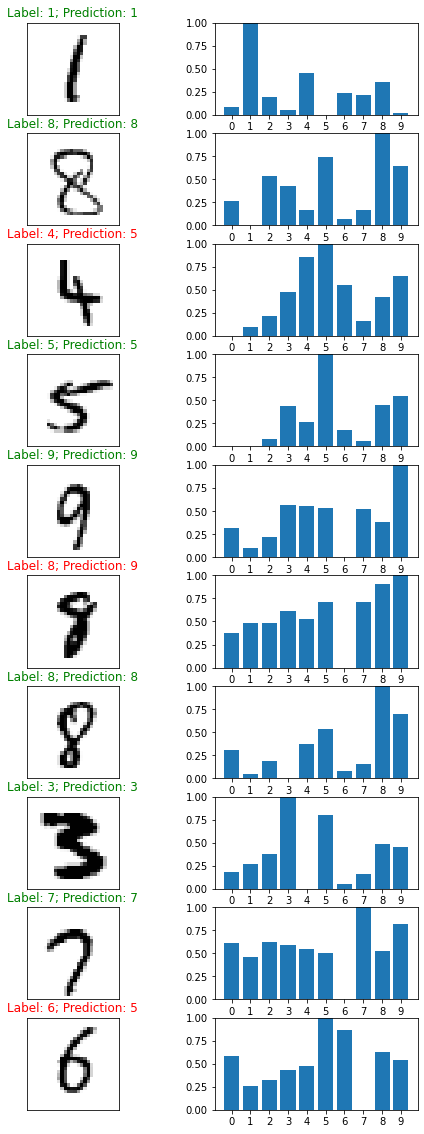

In [20]:
# Find the image set you have specified and plot the image and the model's output
with torch.no_grad():
  for j, data in enumerate(testloader, 0):
    if j == plotIndex[0]:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs, 1)
      
      # Plot each image with the model's prediction
      plt.figure(figsize=(8, 20))
      for i in range(len(predicted)):
        # Plot the image
        plt.subplot(len(predicted), 2,(2*i)+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].squeeze(), cmap=plt.cm.binary)
        if int(labels[i]) == int(predicted[i]):
          plt.title('Label: {}; Prediction: {}'.format(
              int(labels[i]), int(predicted[i])), color='g')
        else:
          plt.title('Label: {}; Prediction: {}'.format(
            int(labels[i]), int(predicted[i])), color='r')
        
        # Plot histogram of predictions
        plt.subplot(len(predicted), 2,(2*i)+2)
        plt.xticks(range(10))
        plt.yticks(np.arange(0, 1.25, 0.25))
        plt.grid(False)
        tmpOut = outputs[i,:].numpy()
        tmpOut_zero = (tmpOut - np.min(tmpOut))
        tmpOut_norm = tmpOut_zero / np.max(tmpOut_zero)
        plt.bar(range(10), tmpOut_norm) #, color="#777777")
        plt.ylim([0, 1])